In [1]:
# =======================================================
# IMPORT LIBRARIES
# =======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)



In [2]:
# =======================================================
# LOAD DATA
# =======================================================
df = pd.read_csv("creditcard.csv")
print("Dataset Loaded ✓")
print(df.head())



Dataset Loaded ✓
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

In [3]:
print("\nShape:", df.shape)


Shape: (284807, 31)


In [4]:
print("\nColumns:", df.columns.tolist())



Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64



Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


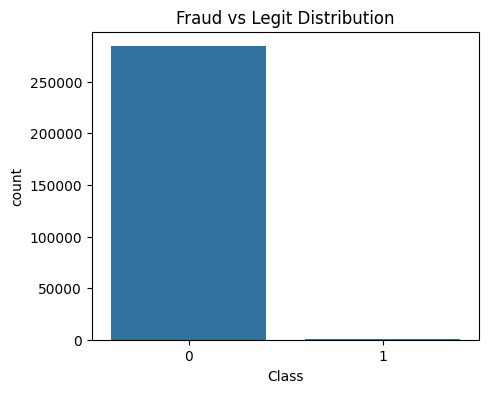

In [6]:
# =======================================================
# CLASS DISTRIBUTION
# =======================================================
print("\nClass Distribution:")
print(df["Class"].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x=df["Class"])
plt.title("Fraud vs Legit Distribution")
plt.show()

In [7]:
# =======================================================
# STATISTICAL SUMMARY
# =======================================================
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00 

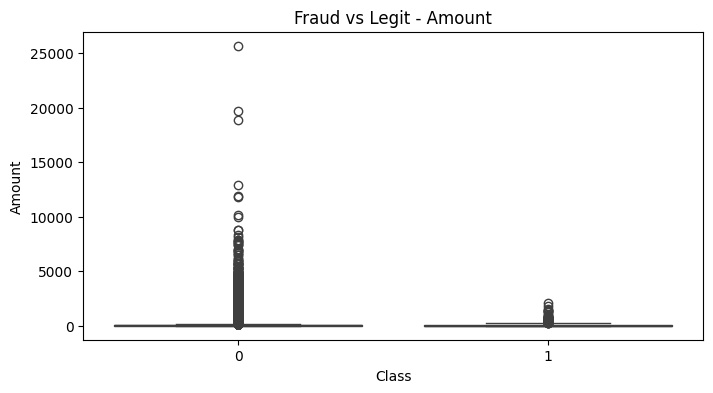

In [8]:
# =======================================================
# FRAUD vs LEGIT AMOUNT
# =======================================================
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Class"], y=df["Amount"]) #Shows whether fraudulent transactions tend to be higher or lower in amount.
plt.title("Fraud vs Legit - Amount")
plt.show()


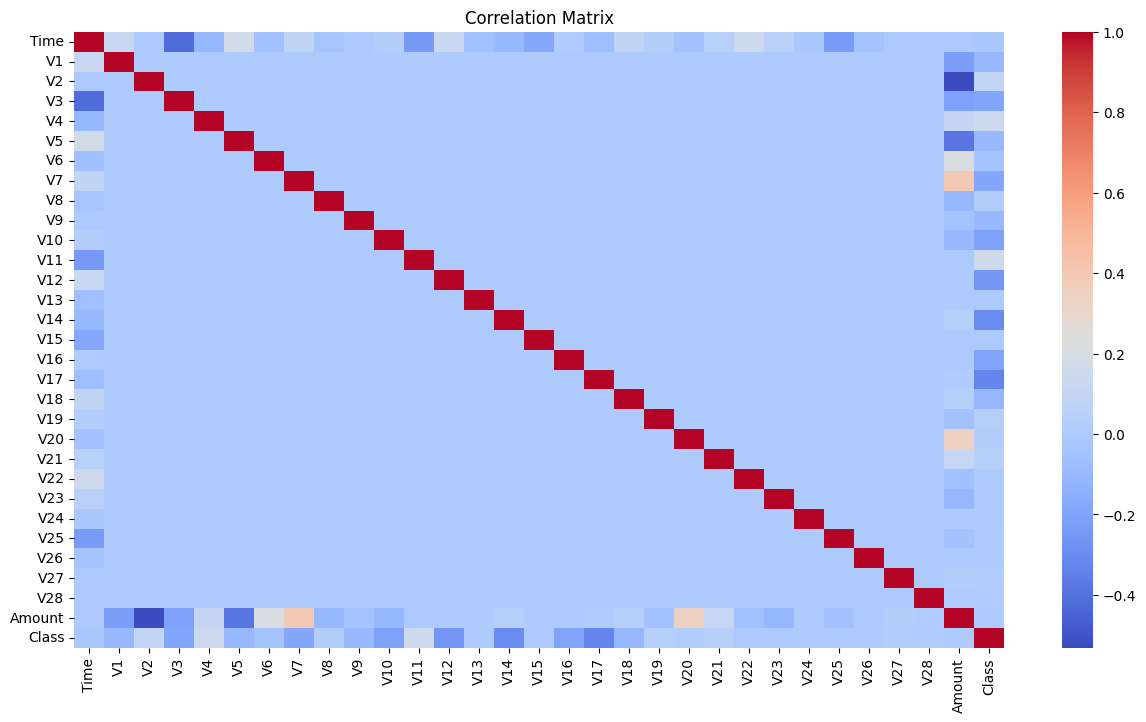

In [9]:
# =======================================================
# CORRELATION HEATMAP
# =======================================================
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

In [10]:
# =======================================================
# PREPROCESSING
# =======================================================
X = df.drop("Class", axis=1)
y = df["Class"]


In [11]:
scaler = StandardScaler() #it stores the val b/w -1 to 1.
X_scaled = scaler.fit_transform(X)
print("\nScaling Done ")


Scaling Done 


In [12]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("Train/Test Split Done")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

Train/Test Split Done
X_train: (227845, 30) X_test: (56962, 30)


In [13]:
# =======================================================
# 1️⃣ LOGISTIC REGRESSION MODEL
# =======================================================
print("\n============================")
print("TRAINING LOGISTIC REGRESSION")
print("============================")

logreg = LogisticRegression(
    max_iter=2000,
    solver="liblinear",
    class_weight="balanced"
)


TRAINING LOGISTIC REGRESSION


In [14]:
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, solver='liblinear')

In [15]:
log_pred = logreg.predict(X_test)

In [16]:
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("\nClassification Report:\n", classification_report(y_test, log_pred))



Logistic Regression Accuracy: 0.9755451002422668

Confusion Matrix:
 [[55479  1385]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [17]:
# =======================================================
# 2️⃣ ANN (NEURAL NETWORK)
# =======================================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
print("\n============================")
print("TRAINING ANN MODEL")
print("============================")

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))#First hidden layer
model.add(Dropout(0.3))#Prevents overfitting

model.add(Dense(16, activation='relu'))#Second hidden layer
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))#Third hidden layer
model.add(Dense(1, activation='sigmoid'))#Output layer (binary classification)


TRAINING ANN MODEL


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [19]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=2048,
    validation_split=0.2,
    verbose=1
)#An epoch is when the entire training dataset passes through the neural network once.

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9580 - loss: 0.3699 - val_accuracy: 0.9982 - val_loss: 0.0312
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9982 - loss: 0.0339 - val_accuracy: 0.9982 - val_loss: 0.0077
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9986 - loss: 0.0120 - val_accuracy: 0.9987 - val_loss: 0.0053
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9986 - loss: 0.0084 - val_accuracy: 0.9991 - val_loss: 0.0049
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9989 - loss: 0.0067 - val_accuracy: 0.9993 - val_loss: 0.0046
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9990 - loss: 0.0063 - val_accuracy: 0.9994 - val_loss: 0.0045
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9991 - loss: 0.0060 - val_accuracy: 0.9994 - val_loss: 0.0044
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9991 - loss: 0.0046 - val_accuracy: 0.9993 - val_loss:

In [20]:
ann_pred = (model.predict(X_test) > 0.5).astype(int)#If prediction is above 0.5 → classify as Fraud.

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step


In [21]:
print("\nANN Accuracy:", accuracy_score(y_test, ann_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, ann_pred))
print("\nClassification Report:\n", classification_report(y_test, ann_pred))



ANN Accuracy: 0.9992977774656788

Confusion Matrix:
 [[56844    20]
 [   20    78]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.80      0.80        98

    accuracy                           1.00     56962
   macro avg       0.90      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [22]:
# =======================================================
# COMPARISON
# =======================================================
print("\n==============================================")
print("MODEL ACCURACY COMPARISON")
print("==============================================")
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("ANN Accuracy:", accuracy_score(y_test, ann_pred))




MODEL ACCURACY COMPARISON
Logistic Regression Accuracy: 0.9755451002422668
ANN Accuracy: 0.9992977774656788


In [23]:
# =======================================================
# USER INPUT → PREDICT RESULT (Single line input)
# =======================================================

print("\n============================")
print(" SINGLE INPUT PREDICTION ")
print("============================")

print("\nEnter 30 values separated by commas:")
print("Format: Time, V1, V2, V3, ..., V28, Amount\n")

user_input = input("Enter your 30 feature values: ")

# Split and convert to float
user_data = list(map(float, user_input.split(",")))

if len(user_data) != len(X.columns):
    print("\n❌ ERROR: You must enter exactly", len(X.columns), "values.")
    exit()

# Convert to array
user_array = np.array(user_data).reshape(1, -1)

# Logistic Regression Prediction
logistic_output = logreg.predict(user_array)
logistic_label = "FRAUD" if logistic_output[0] == 1 else "LEGIT"

# ANN Prediction (Needs scaling)
user_scaled = scaler.transform(user_array)
ann_output = (model.predict(user_scaled) > 0.5).astype(int)
ann_label = "FRAUD" if ann_output[0][0] == 1 else "LEGIT"

print("\n============================")
print("      FINAL PREDICTION      ")
print("============================")
print(f"Logistic Regression: {logistic_label}")
print(f"ANN Model:            {ann_label}")


 SINGLE INPUT PREDICTION 

Enter 30 values separated by commas:
Format: Time, V1, V2, V3, ..., V28, Amount

Enter your 30 feature values: 100,-1.35,0.55,2.1,0.34,-0.28,0.45,0.12,-0.18,0.67,0.22,-0.31,-0.45,0.51,-0.80,0.14,0.28,-0.19,0.07,0.40,0.12,-0.13,-0.05,-0.02,-0.06,0.18,-0.38,0.21,-0.12,55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

      FINAL PREDICTION      
Logistic Regression: FRAUD
ANN Model:            LEGIT


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
